In [9]:
import pandas as pd

# Load the pest-to-pesticide mapping
csv_path = "Pesticide_Dataset/Pesticides.csv"
df = pd.read_csv(csv_path)

def get_pesticide(pest_name):
    row = df[df['Pest Name'].str.lower() == pest_name.lower()]
    return row['Most Commonly Used Pesticides'].values[0] if not row.empty else "No data available"


In [10]:
df

,Pest Name,Most Commonly Used Pesticides
0,Adristyrannus,"Acephate, Malathion, Permethrin"
1,Aleurocanthus spiniferus,"Imidacloprid, Acetamiprid, Chlorpyrifos"
2,alfalfa plant bug,"Imidacloprid, Lambda-cyhalothrin, Chlorpyrifos"
3,alfalfa seed chalcid,"Azadirachtin, Imidacloprid, Spinosad"
4,alfalfa weevil,"Chlorpyrifos, Cyfluthrin, Carbaryl"
...,...,...
127,wireworm,"Chlorpyrifos, Imidacloprid, Fipronil"
128,Xylotrechus,"Methoxyfenozide, Chlorpyrifos, Fipronil"
129,yellow cutworm,"Chlorpyrifos, Methomyl, Carbaryl"
130,Yellow Mite,"Spiromesifen, Abamectin, Fenazaquin"


In [11]:
import os
import random

pest_dataset_path = "Pest_Dataset"

def get_pest_image(pest_name):
    pest_folder = os.path.join(pest_dataset_path, pest_name)
    if os.path.exists(pest_folder) and os.path.isdir(pest_folder):
        images = [img for img in os.listdir(pest_folder) if img.endswith(('.jpg', '.png'))]
        if images:
            return os.path.join(pest_folder, random.choice(images))
    return None


In [17]:
from google.generativeai import configure, GenerativeModel
import google.generativeai as genai
from dotenv import dotenv_values
GEMINI_API_KEY = dotenv_values(".env").get("GEMINI_API_KEY")
# Configure Gemini API Key
configure(api_key=GEMINI_API_KEY)

model = GenerativeModel("models/gemini-2.0-flash")


def query_gemini(pest_name):
    pesticide_info = get_pesticide(pest_name)
    image_path = get_pest_image(pest_name)

    prompt = f"""
    The user has identified a pest: {pest_name}.
    - Recommended pesticide: {pesticide_info}.
    - The pest image is available at: {image_path if image_path else 'No image found'}.
    
    Provide an explanation of why this pesticide is recommended.
    """

    response = model.generate_content(prompt)
    return response.text, image_path


In [18]:
query_gemini("Adristyrannus")

('Okay, based on the information provided, here\'s why Acephate, Malathion, and Permethrin might be recommended for controlling *Adristyrannus*:\n\n**Understanding the Pesticides**\n\n*   **Acephate:** This is a systemic organophosphate insecticide.  "Systemic" means that it\'s absorbed by the plant and transported throughout its tissues.  This makes it effective against insects that feed on the plant, even those that might be hidden. Acephate works by inhibiting cholinesterase, an enzyme essential for nerve function in insects, leading to paralysis and death.\n\n*   **Malathion:** This is a broad-spectrum, non-systemic organophosphate insecticide. It\'s effective through contact and ingestion. Like Acephate, it also inhibits cholinesterase, disrupting the insect\'s nervous system. Malathion breaks down relatively quickly in the environment compared to some older organophosphates.\n\n*   **Permethrin:** This is a synthetic pyrethroid insecticide. Pyrethroids disrupt the insect\'s nervo

In [14]:
import google.generativeai as genai

genai.configure(api_key=GEMINI_API_KEY)

available_models = genai.list_models()
for model in available_models:
    print(model.name)


models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.5-pro-exp-03-25
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-thinking

In [19]:
import chromadb
import pandas as pd
from PIL import Image
import google.generativeai as genai

print("All libraries installed successfully!")


All libraries installed successfully!


In [20]:
import pandas as pd

# Load the CSV file
csv_file_path = "Pesticide_Dataset/Pesticides.csv"  # Update this path if needed
df = pd.read_csv(csv_file_path)

# Convert the CSV file into a dictionary
pesticide_dict = dict(zip(df["Pest Name"], df["Most Commonly Used Pesticides"]))

# Test it
print("Pesticide Data Loaded Successfully!")
print(pesticide_dict)  # This should print the dictionary


Pesticide Data Loaded Successfully!
{'Adristyrannus': 'Acephate, Malathion, Permethrin', 'Aleurocanthus spiniferus': 'Imidacloprid, Acetamiprid, Chlorpyrifos', 'alfalfa plant bug': 'Imidacloprid, Lambda-cyhalothrin, Chlorpyrifos', 'alfalfa seed chalcid': 'Azadirachtin, Imidacloprid, Spinosad', 'alfalfa weevil': 'Chlorpyrifos, Cyfluthrin, Carbaryl', 'Ampelophaga': 'Chlorpyrifos, Methoxyfenozide, Spinosad', 'aphids': 'Imidacloprid, Acetamiprid, Thiamethoxam', 'Aphis citricola Vander Goot': 'Imidacloprid, Thiacloprid, Thiamethoxam', 'Apolygus lucorum': 'Lambda-cyhalothrin, Chlorpyrifos, Imidacloprid', 'army worm': 'Chlorpyrifos, Lambda-cyhalothrin, Bifenthrin', 'asiatic rice borer': 'Emamectin benzoate, Fipronil, Chlorantraniliprole', 'Bactrocera tsuneonis': 'Spinosad, Malathion, Dimethoate', 'beet army worm': 'Bacillus thuringiensis, Methoxyfenozide, Spinosad', 'beet fly': 'Carbaryl, Methomyl, Dimethoate', 'Beet spot flies': 'Dimethoate, Chlorpyrifos, Carbaryl', 'beet weevil': 'Chlorpyri

In [24]:
import os
from PIL import Image

# Define the pest dataset directory
PEST_DATASET_DIR = "Pest_Dataset"

def get_pest_image(pest_name):
    """Fetches the first image of a given pest from the dataset."""
    pest_dir = os.path.join(PEST_DATASET_DIR, pest_name)
    
    if os.path.exists(pest_dir) and os.path.isdir(pest_dir):
        images = [f for f in os.listdir(pest_dir) if f.endswith((".jpg", ".png", ".jpeg"))]
        
        if images:
            image_path = os.path.join(pest_dir, images[0])
            return Image.open(image_path)
    
    print(f"No image found for pest: {pest_name}")
    return None

# Test it
if __name__ == "__main__":
    pest_name = "Termite"  # Change this to any pest name from your dataset
    img = get_pest_image(pest_name)
    
    if img:
        img.show()  # Opens the image
    else:
        print("Pest image not found.")


In [32]:
import chromadb
import pandas as pd
import time

# Load the CSV file
csv_file_path = "Pesticide_Dataset/Pesticides.csv"
df = pd.read_csv(csv_file_path)

# Initialize ChromaDB
chroma_client = chromadb.PersistentClient(path="rag_system/chroma_db")  # Persistent storage
collection = chroma_client.get_or_create_collection(name="pest_info")

# Batch insert with a delay to avoid timeout
batch_size = 5  # Insert 5 rows at a time
for i in range(0, len(df), batch_size):
    batch = df.iloc[i : i + batch_size]
    
    ids = [str(idx) for idx in batch.index]
    documents = batch["Pest Name"].tolist()
    metadatas = [{"pesticide": pesticide} for pesticide in batch["Most Commonly Used Pesticides"]]

    collection.add(ids=ids, documents=documents, metadatas=metadatas)
    
    print(f"Inserted {len(batch)} records...")
    time.sleep(0.5)  # Small delay to prevent timeouts

print("✅ ChromaDB setup complete! Pest names stored successfully.")


/Users/pradeesh11/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [03:06<00:00, 446kiB/s]   


Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 5 records...
Inserted 2 records...
✅ ChromaDB setup complete! Pest names stored successfully.


In [33]:
import chromadb
import pandas as pd
from sentence_transformers import SentenceTransformer

# Initialize ChromaDB client
chroma_client = chromadb.PersistentClient(path="./chroma_db")

# Load the CSV file
csv_path = "Pesticide_Dataset/Pesticides.csv"  # Change this to your actual file path
df = pd.read_csv(csv_path)

# Initialize the embedding model
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

# Create a collection in ChromaDB
collection = chroma_client.get_or_create_collection(name="pest_data")

# Generate embeddings and store in ChromaDB
for idx, row in df.iterrows():
    pest_name = row["Pest Name"]
    pesticide = row["Most Commonly Used Pesticides"]
    
    # Compute embedding for pest name
    embedding = model.encode(pest_name).tolist()
    
    # Add to ChromaDB
    collection.add(
        ids=[str(idx)],  # Unique ID for each pest
        embeddings=[embedding],  # Embedding vector
        metadatas=[{"pest_name": pest_name, "pesticide": pesticide}]
    )

print("✅ Pest embeddings stored in ChromaDB successfully!")


✅ Pest embeddings stored in ChromaDB successfully!


In [35]:
import chromadb
from sentence_transformers import SentenceTransformer

# Initialize ChromaDB client
chroma_client = chromadb.PersistentClient(path="./chroma_db")

# Load the stored collection
collection = chroma_client.get_collection(name="pest_data")

# Initialize the embedding model
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

def find_pesticide_for_pest(user_query):
    # Convert user input to embedding
    query_embedding = model.encode(user_query).tolist()

    # Search in ChromaDB
    results = collection.query(
        query_embeddings=[query_embedding],
        n_results=1  # Get the closest match
    )

    # Extract result
    if results["ids"][0]:  
        matched_pest = results["metadatas"][0][0]["pest_name"]
        pesticide = results["metadatas"][0][0]["pesticide"]
        
        print(f"🔍 Closest Pest Found: {matched_pest}")
        print(f"💊 Recommended Pesticide: {pesticide}")
    else:
        print("❌ No matching pest found in the database.")

# Example usage
user_input = input("Enter the pest name: ")
find_pesticide_for_pest(user_input)


🔍 Closest Pest Found: aphids
💊 Recommended Pesticide: Imidacloprid, Acetamiprid, Thiamethoxam


🔍 Closest Pest Found: Adristyrannus
💊 Recommended Pesticide: Acephate, Malathion, Permethrin


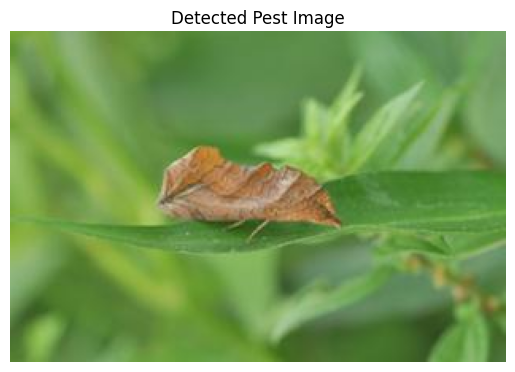

In [37]:
import chromadb
import os
import cv2
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

# Paths
PEST_IMAGE_DIR = "Pest_Dataset"  # Change this to your actual dataset directory

# Initialize ChromaDB client
chroma_client = chromadb.PersistentClient(path="./chroma_db")

# Load the stored collection
collection = chroma_client.get_collection(name="pest_data")

# Initialize the embedding model
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

def find_pesticide_and_image(user_query):
    # Convert user input to embedding
    query_embedding = model.encode(user_query).tolist()

    # Search in ChromaDB
    results = collection.query(
        query_embeddings=[query_embedding],
        n_results=1  # Get the closest match
    )

    # Extract result
    if results["ids"][0]:  
        matched_pest = results["metadatas"][0][0]["pest_name"]
        pesticide = results["metadatas"][0][0]["pesticide"]
        
        print(f"🔍 Closest Pest Found: {matched_pest}")
        print(f"💊 Recommended Pesticide: {pesticide}")

        # Find and display the pest image
        pest_folder = os.path.join(PEST_IMAGE_DIR, matched_pest)
        if os.path.exists(pest_folder):
            image_files = [f for f in os.listdir(pest_folder) if f.endswith((".jpg", ".png", ".jpeg"))]
            if image_files:
                image_path = os.path.join(pest_folder, image_files[0])  # Take the first image
                show_image(image_path)
            else:
                print("❌ No images found for this pest.")
        else:
            print("❌ No folder found for this pest.")

    else:
        print("❌ No matching pest found in the database.")

def show_image(image_path):
    """ Display the image using OpenCV """
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    plt.imshow(img)
    plt.axis("off")  # Hide axes
    plt.title("Detected Pest Image")
    plt.show()

# Example usage
user_input = input("Enter the pest name: ")
find_pesticide_and_image(user_input)



✅ Best Match Found: aphids
🛡 Recommended Pesticide: Imidacloprid, Acetamiprid, Thiamethoxam

📸 Displaying image for: aphids


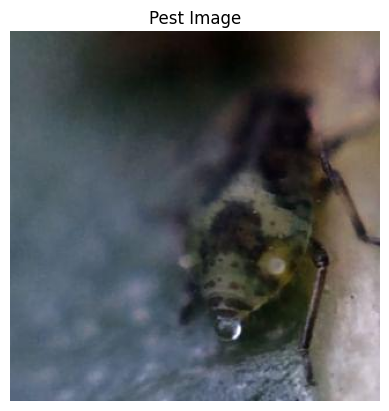


🤖 AI-Powered Explanation:
Imidacloprid, Acetamiprid, and Thiamethoxam are effective against aphids because they are systemic insecticides that disrupt the insect's nervous system. This leads to paralysis and death upon ingestion or contact.

**Safety:** Wear protective clothing (gloves, long sleeves) and avoid application during windy conditions or near water sources. Follow label instructions carefully.

**Application:** Apply as a foliar spray, ensuring thorough coverage of affected plants.



In [43]:
import chromadb
import google.generativeai as genai
from sentence_transformers import SentenceTransformer
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from dotenv import dotenv_values
GEMINI_API_KEY = dotenv_values(".env").get("GEMINI_API_KEY")
# Configure Gemini API
genai.configure(api_key=GEMINI_API_KEY)
gemini_model = genai.GenerativeModel("models/gemini-2.0-flash")

# Load the embedding model
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

# Initialize ChromaDB client
chroma_client = chromadb.PersistentClient(path="./chroma_db")
collection = chroma_client.get_collection(name="pest_data")

# Define the directory where pest images are stored
PEST_IMAGE_DIR = "./pest_dataset"


system_instruction = """
You are AgriAssist, an AI assistant specialized in agriculture. 
You should only answer questions related to pests, plant diseases, fertilizers, pesticides, and crop management. 
If a user asks anything unrelated, politely refuse to answer.
And all the response you give should not exceed 5 lines.
"""


def retrieve_pest_data(user_query):
    """ Retrieve best matching pest and its pesticide from ChromaDB """
    query_embedding = model.encode(user_query).tolist()

    results = collection.query(query_embeddings=[query_embedding], n_results=1)

    if results["ids"][0]:  
        matched_pest = results["metadatas"][0][0]["pest_name"]
        pesticide = results["metadatas"][0][0]["pesticide"]
        return matched_pest, pesticide
    
    return None, None

def get_pest_image(pest_name):
    """ Fetch pest image from dataset folder """
    pest_folder = os.path.join(PEST_IMAGE_DIR, pest_name)
    
    if os.path.exists(pest_folder):
        images = os.listdir(pest_folder)
        if images:
            image_path = os.path.join(pest_folder, images[0])  # Take the first image
            return image_path

    return None

def generate_gemini_response(pest_name, pesticide):
    """ Generate AI-powered explanation using Gemini 2.0 Flash """
    prompt = f"""
    
    
    The user has identified a pest: {pest_name}.
    - Recommended pesticide: {pesticide}.
    
    Give a **very short** and precise summary (2-3 sentences) about why this pesticide is effective for {pest_name}.
    Provide safety precautions and the best method to apply it.
    
    You are AgriAssist, an AI expert in agriculture. 
    You must ONLY answer questions related to:
    - Pests and pest control
    - Fertilizers and pesticides
    - Crop management
    - Soil health and plant diseases
    ❌ If the user asks anything unrelated (Python, coding, movies, etc.), strictly respond:  
    "I only assist with agriculture-related topics. Please ask about crops, pests, or farming."
    
    """
    
    response = gemini_model.generate_content(prompt)
    return response.text

def display_image(image_path):
    """ Display pest image using OpenCV & PIL """
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis("off")
    plt.title("Pest Image")
    plt.show()

if __name__ == "__main__":
    user_query = input("Enter the pest name: ")  

    matched_pest, pesticide = retrieve_pest_data(user_query)

    if matched_pest:
        print(f"\n✅ Best Match Found: {matched_pest}")
        print(f"🛡 Recommended Pesticide: {pesticide}")

        # Fetch pest image
        pest_image_path = get_pest_image(matched_pest)

        if pest_image_path:
            print(f"\n📸 Displaying image for: {matched_pest}")
            display_image(pest_image_path)
        else:
            print("\n❌ No image found for this pest.")

        # Get AI explanation from Gemini
        ai_response = generate_gemini_response(matched_pest, pesticide)
        print("\n🤖 AI-Powered Explanation:")
        print(ai_response)
    else:
        print("\n❌ No matching pest found in the database.")
